# Plots

* Understanding relationship between factors and HRC Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
dataset_path = "../data/final/wo_na_all_cols.csv"
df = pd.read_csv(dataset_path)
df.head()

,Date,Month,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-09-01,Sep-06,472,59,116,252,211,261,36.0,5.0,2.0,3.0,14.0,28.2,33.0,1.61,5.14,28.14,247.20,405.80,56.50,41.00,27.3,24.3,18.5,24.0,6.0,34.2,3.9,51.7
1,2006-10-01,Oct-06,477,62,85,260,185,292,38.0,5.0,1.0,4.0,14.0,26.8,34.0,1.42,5.19,21.97,297.69,462.30,56.50,40.77,26.8,24.1,18.8,25.1,11.4,31.8,6.7,55.9
2,2006-11-01,Nov-06,470,62,84,262,182,288,38.0,6.0,2.0,5.0,16.0,26.6,31.0,1.45,6.11,28.56,297.69,521.50,59.20,37.48,26.6,24.0,18.4,26.1,8.3,28.9,7.2,54.9
3,2006-12-01,Dec-06,470,61,90,270,188,282,39.0,6.0,2.0,4.0,15.0,24.5,32.0,1.53,6.05,35.85,326.30,588.20,66.70,38.20,24.0,21.8,17.2,27.0,13.1,15.8,16.1,50.1
4,2007-01-01,Jan-07,470,62,98,273,197,273,38.0,5.0,2.0,3.0,13.0,23.4,35.0,1.53,4.95,35.85,133.55,252.28,69.01,39.80,23.4,24.3,17.2,45.0,8.6,15.8,16.1,55.4


In [3]:
df.columns = (
    df.columns
    .str.replace(r'\r|\n', ' ', regex=True)          # Replace carriage returns and newlines with space
    .str.replace(r'\s+', ' ', regex=True)            # Replace multiple spaces with single space
    .str.strip()                                     # Remove leading/trailing spaces
)

In [4]:
df.columns

Index(['Date', 'Month', 'HRC (FOB, $/t)', 'Iron Ore (CFR, $/t)',
       'HCC (Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'RM Cost ($/t)', 'HRC - RM Spread ($/t)', 'CS Production (Mnt)',
       'Exports (Mnt)', 'Imports (Mnt)', 'Net Exports (Mnt)',
       'Export as % of Production', 'Cummulative FAI growth (%)', 'ACSU (Mnt)',
       'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Iron ore Imports (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)', 'Monthly Iron ore Production (Mt.)',
       'Stocks of iron ore at China's seaport (Mt.)',
       'YTD Growth rate of Investment (FAI)',
       'FAI in urban real estate development (y-o-y) Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
       'Air Conditioner (y-o-y)', 'Manufacturing PMI 

In [5]:
df = df.dropna()

In [6]:
y_col = "HRC (FOB, $/t)"

In [7]:
excluded_cols = ["Month", "Date", y_col]
x_columns = [col for col in df.columns if col not in excluded_cols]

In [8]:
df[x_columns]

,"Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,59,116,252,211,261,36.0,5.0,2.0,3.0,14.0,28.2,33.0,1.61,5.14,28.14,247.20,405.80,56.50,41.00,27.3,24.3,18.5,24.0,6.0,34.2,3.9,51.7
1,62,85,260,185,292,38.0,5.0,1.0,4.0,14.0,26.8,34.0,1.42,5.19,21.97,297.69,462.30,56.50,40.77,26.8,24.1,18.8,25.1,11.4,31.8,6.7,55.9
2,62,84,262,182,288,38.0,6.0,2.0,5.0,16.0,26.6,31.0,1.45,6.11,28.56,297.69,521.50,59.20,37.48,26.6,24.0,18.4,26.1,8.3,28.9,7.2,54.9
3,61,90,270,188,282,39.0,6.0,2.0,4.0,15.0,24.5,32.0,1.53,6.05,35.85,326.30,588.20,66.70,38.20,24.0,21.8,17.2,27.0,13.1,15.8,16.1,50.1
4,62,98,273,197,273,38.0,5.0,2.0,3.0,13.0,23.4,35.0,1.53,4.95,35.85,133.55,252.28,69.01,39.80,23.4,24.3,17.2,45.0,8.6,15.8,16.1,55.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,107,249,378,420,98,92.0,9.0,1.0,8.0,10.0,4.0,83.0,0.58,8.75,97.42,611.17,554.10,96.75,149.26,3.9,-10.1,-12.0,5.7,1.3,9.7,13.8,47.8
214,106,237,376,407,92,83.0,8.0,1.0,7.0,9.0,4.0,75.0,0.51,7.83,102.60,713.77,622.80,68.67,156.90,3.6,-10.2,-12.1,4.5,1.4,7.3,9.5,42.5
215,99,206,346,363,100,78.0,9.0,1.0,9.0,12.0,3.0,68.0,0.51,9.50,101.18,814.95,696.50,73.73,160.32,3.4,-10.2,-12.0,3.4,1.1,7.3,7.8,40.4
216,94,187,337,337,116,77.0,10.0,1.0,10.0,13.0,3.0,66.0,0.55,10.15,103.92,918.87,781.40,84.88,157.93,3.4,-10.1,-12.2,2.7,1.1,7.5,8.0,49.0


In [9]:
x_columns

['Iron Ore (CFR, $/t)',
 'HCC (Aus FOB, $/t)',
 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
 'RM Cost ($/t)',
 'HRC - RM Spread ($/t)',
 'CS Production (Mnt)',
 'Exports (Mnt)',
 'Imports (Mnt)',
 'Net Exports (Mnt)',
 'Export as % of Production',
 'Cummulative FAI growth (%)',
 'ACSU (Mnt)',
 'Monthly Imports of semis & finished steel (Mt.)',
 'Monthly Export of semis & finished steel (Mt.)',
 'Monthly Iron ore Imports (Mt.)',
 'YTD Iron ore Imports (Mt.)',
 'YTD Iron ore Production (Mt.)',
 'Monthly Iron ore Production (Mt.)',
 "Stocks of iron ore at China's seaport (Mt.)",
 'YTD Growth rate of Investment (FAI)',
 'FAI in urban real estate development (y-o-y) Growth',
 'Floor space under construction (y-o-y)',
 'Automobile Production (y-o-y)',
 'Civil Metal-Vessels/Steel Ships (y-o-y)',
 'Household Fridges (y-o-y)',
 'Air Conditioner (y-o-y)',
 'Manufacturing PMI for steel']

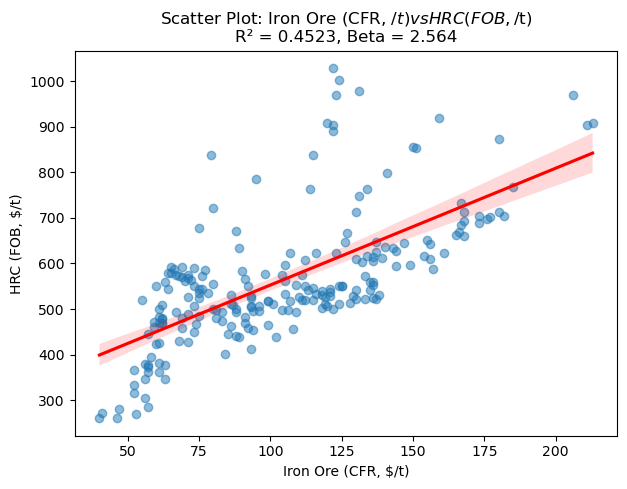

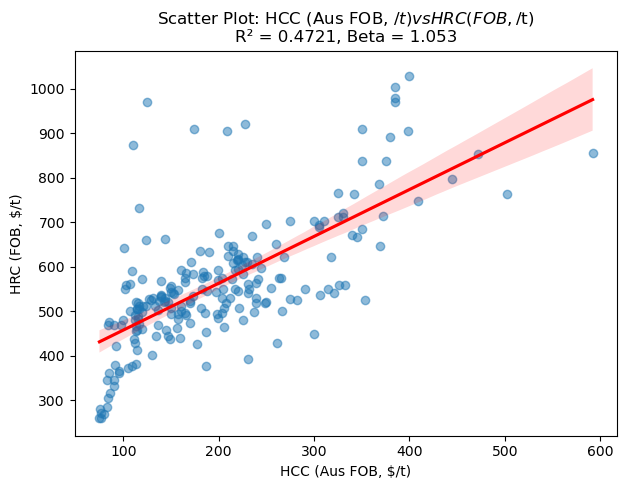

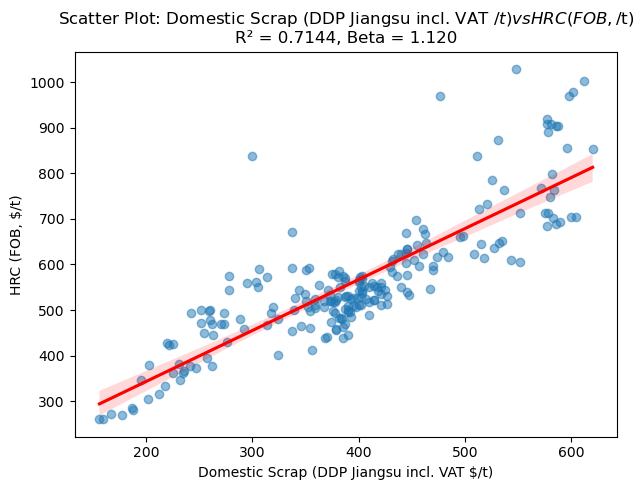

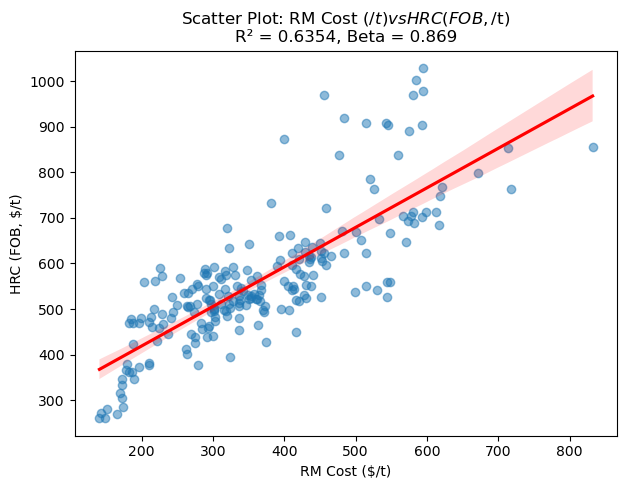

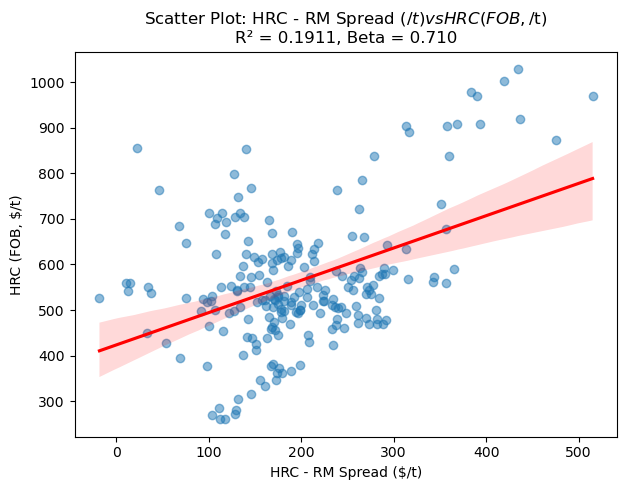

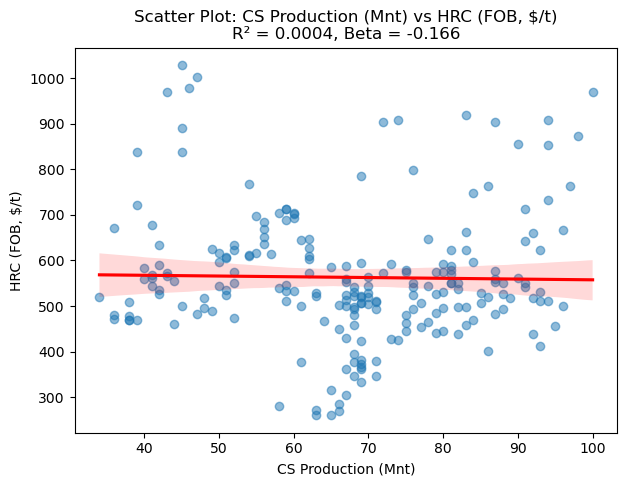

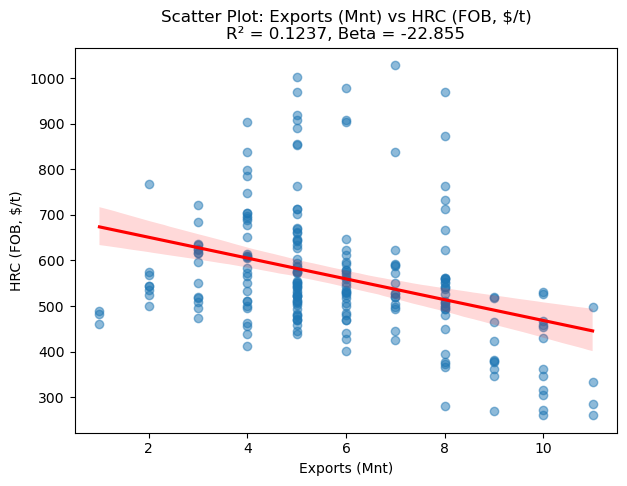

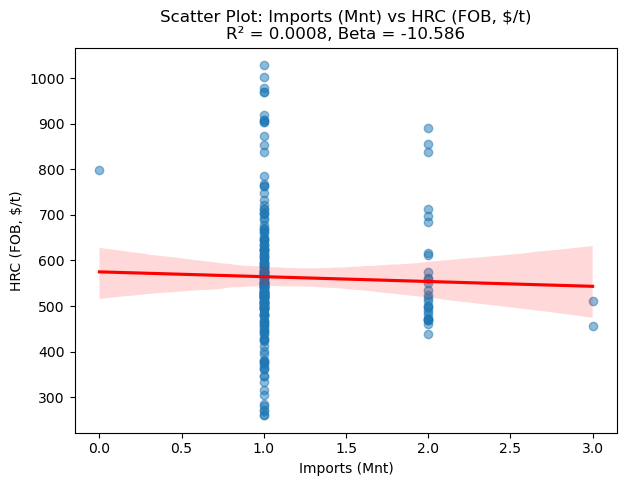

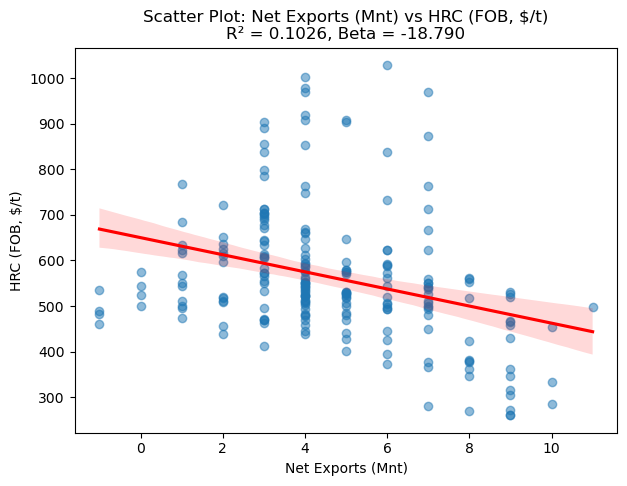

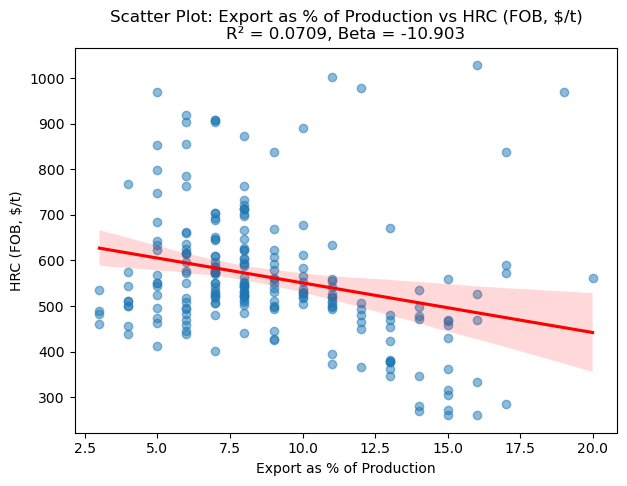

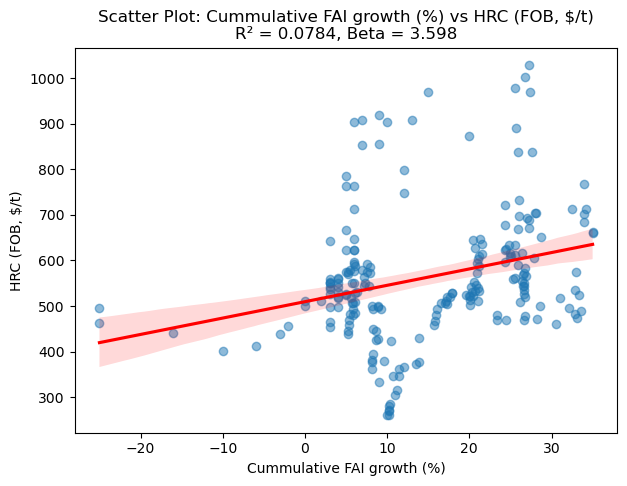

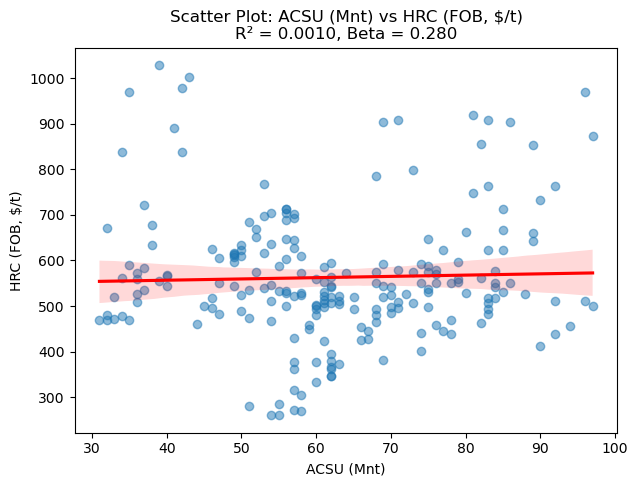

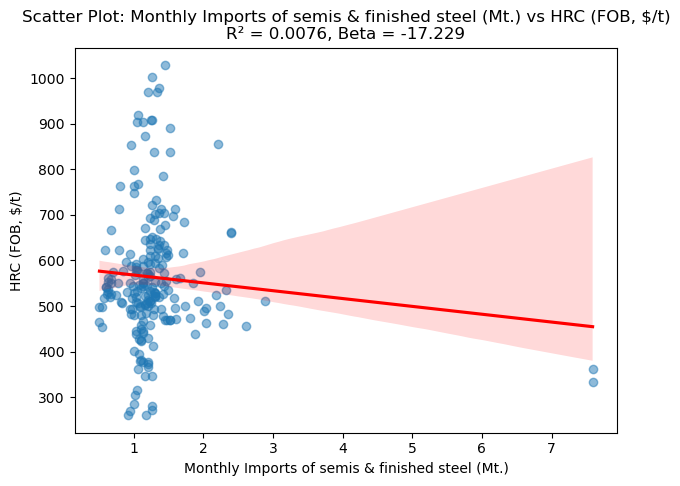

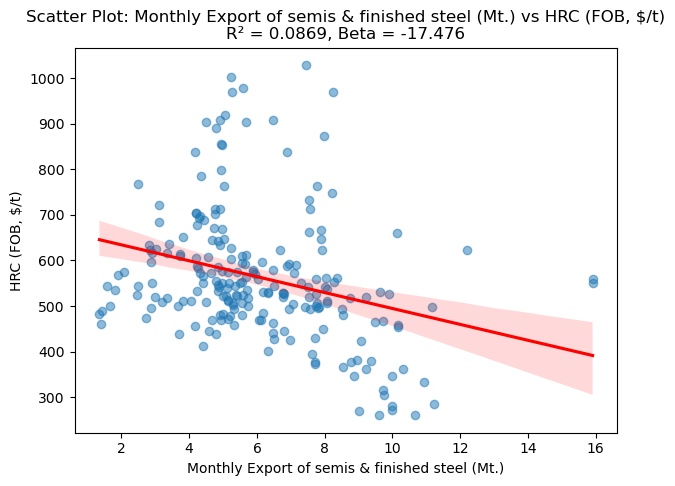

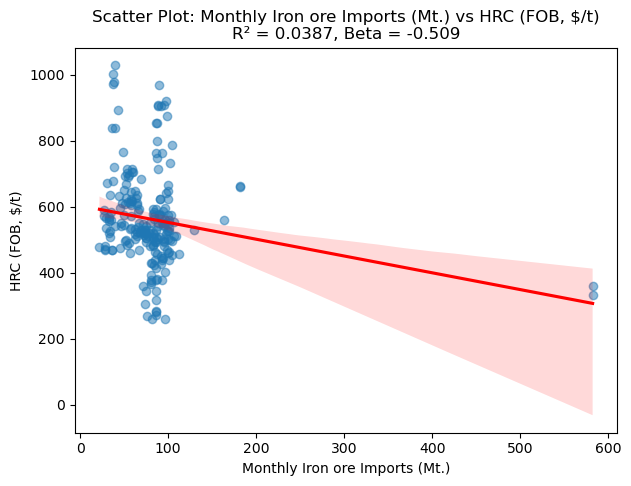

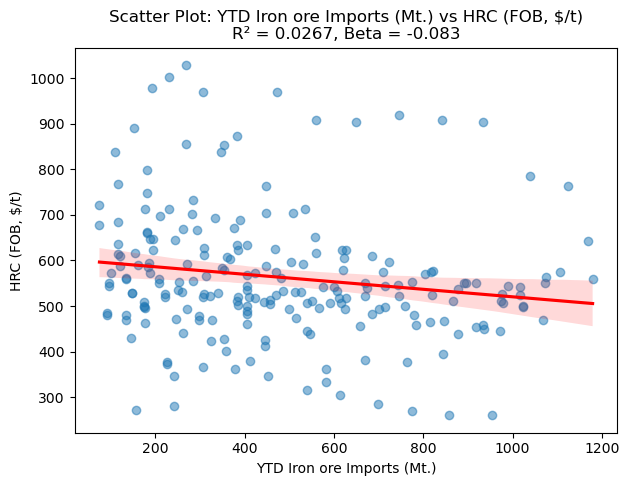

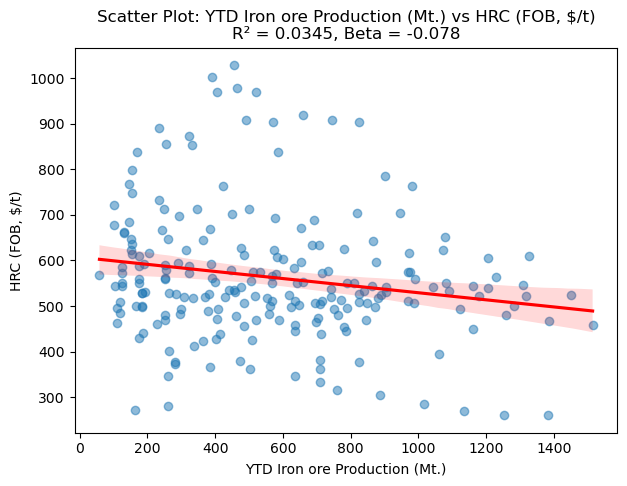

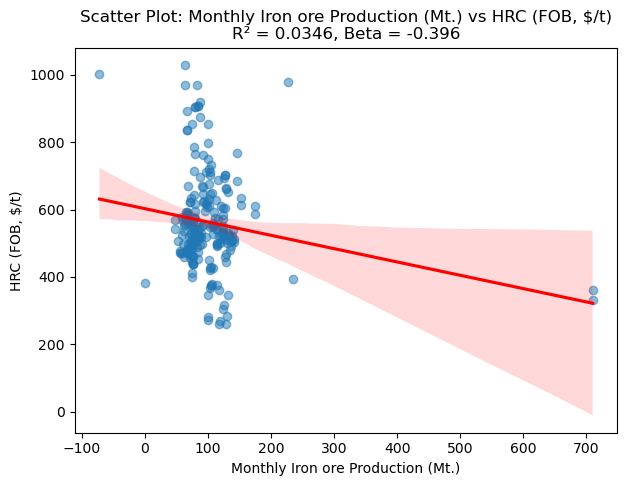

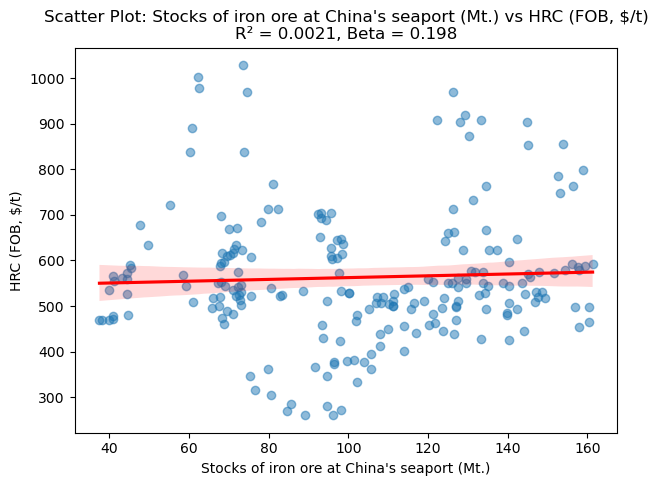

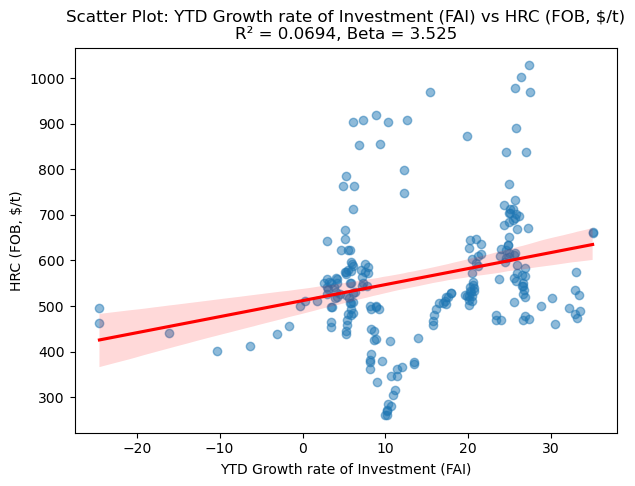

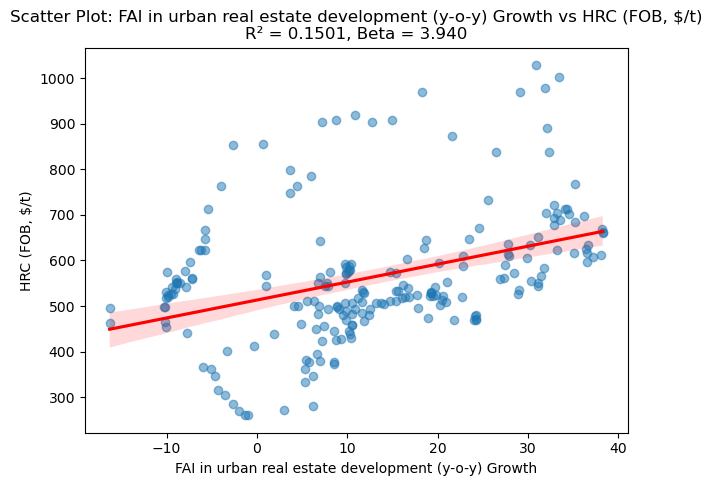

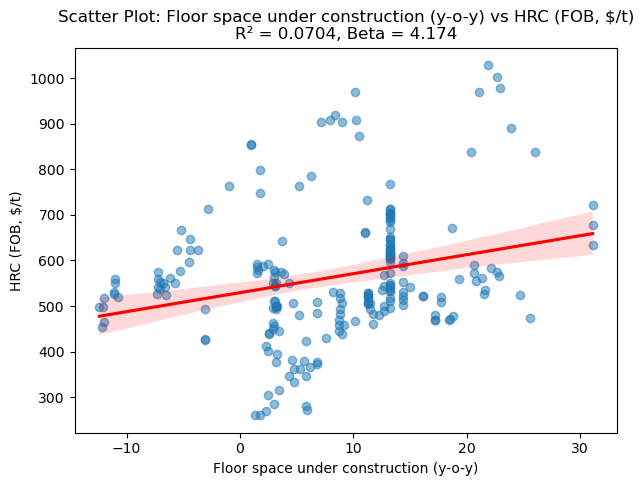

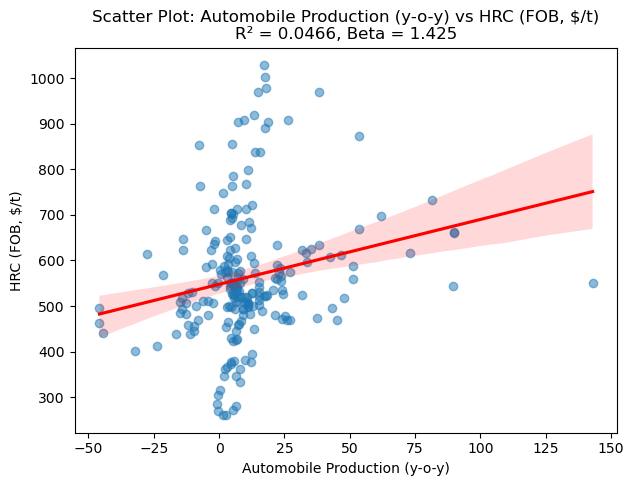

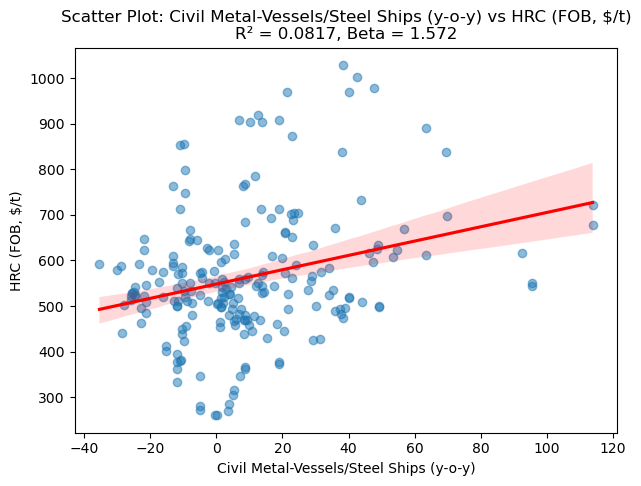

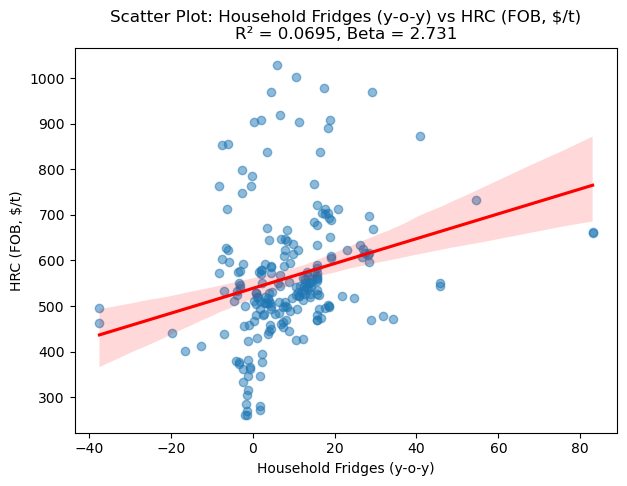

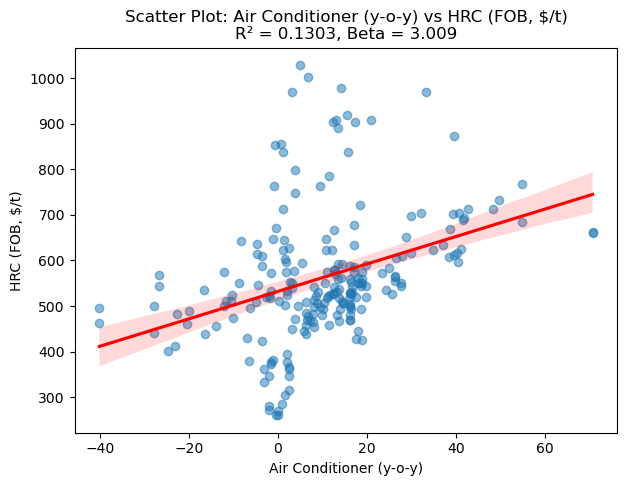

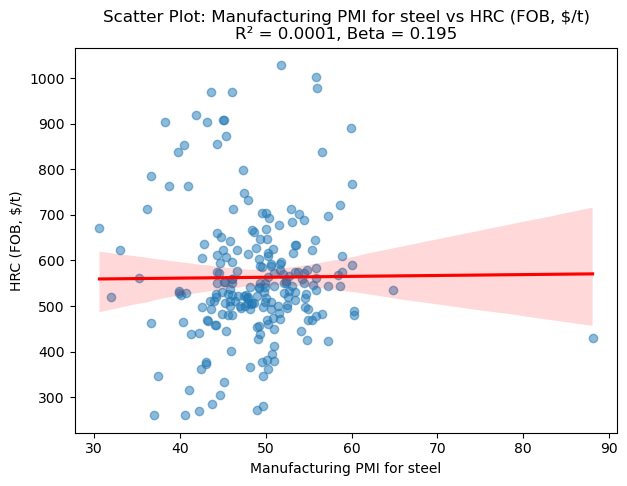

In [10]:
from scipy.stats import linregress

for x_col in x_columns:
    # Drop NaN values for the current variable
    temp_df = df[[x_col, y_col]].dropna()

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temp_df[x_col], temp_df[y_col])
    r_squared = r_value**2  # R² value

    # Create plot
    plt.figure(figsize=(7, 5))
    sns.regplot(x=temp_df[x_col], y=temp_df[y_col], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

    # Labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Scatter Plot: {x_col} vs {y_col}\nR² = {r_squared:.4f}, Beta = {slope:.3f}")

    # Show plot
    plt.show()

In [11]:
# remove outliers
spread_col = "HRC - RM Spread ($/t)"
fai_col = "FAI in urban real estate development (y-o-y) Growth"

In [12]:
# remove outliers for hrc - rm spread (use IQR)
Q1 = df[spread_col].quantile(0.25)
Q3 = df[spread_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[spread_col] >= lower_bound) & (df[spread_col] <= upper_bound)]

# remove outliers for FAI in urban real estate development (within ±20% band)
mean_fai = df[fai_col].mean()
lower_fai = mean_fai * 0.8  # 80% of mean
upper_fai = mean_fai * 1.2  # 120% of mean
df = df[(df[fai_col] >= lower_fai) & (df[fai_col] <= upper_fai)]

In [13]:
def plot_and_stats(x_col, y_col, df):
    temp_df = df[[x_col, y_col]].dropna() 

    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temp_df[x_col], temp_df[y_col])
    r_squared = r_value**2  # R² value

    # Correlation
    correlation = temp_df[x_col].corr(temp_df[y_col])

    # Create plot
    plt.figure(figsize=(7, 5))
    sns.regplot(x=temp_df[x_col], y=temp_df[y_col], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

    # Labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Scatter Plot: {x_col} vs {y_col}\nR² = {r_squared:.3f}, Beta = {slope:.3f}, Corr = {correlation:.3f}")

    # Show plot
    plt.show()

    # Print stats
    print(f"Stats for {x_col} vs {y_col}:")
    print(f"  Correlation: {correlation:.3f}")
    print(f"  R²: {r_squared:.3f}")
    print(f"  Beta (Slope): {slope:.3f}")
    print("-" * 50)

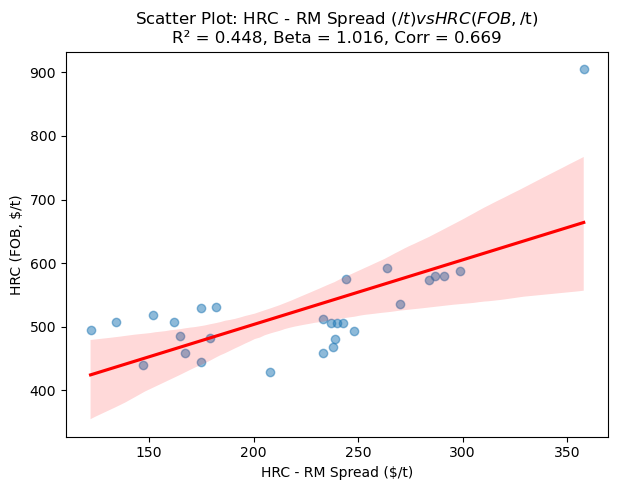

Stats for HRC - RM Spread ($/t) vs HRC (FOB, $/t):
  Correlation: 0.669
  R²: 0.448
  Beta (Slope): 1.016
--------------------------------------------------


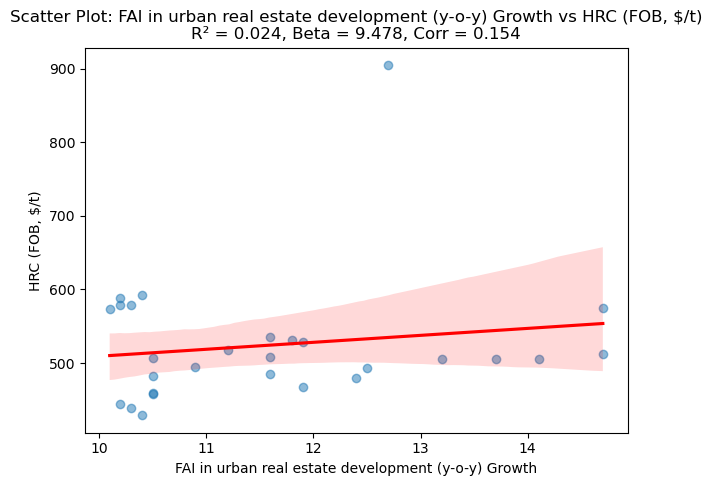

Stats for FAI in urban real estate development (y-o-y) Growth vs HRC (FOB, $/t):
  Correlation: 0.154
  R²: 0.024
  Beta (Slope): 9.478
--------------------------------------------------


In [14]:
plot_and_stats(spread_col, y_col, df)  # spread vs HRC
plot_and_stats(fai_col, y_col, df)     # FAI vs HRC

## Collinearity Plot


🔹 **Highly Correlated Features (|r| ≥ 0.7):**
                                      Feature 1  \
43                   Cummulative FAI growth (%)   
76          YTD Growth rate of Investment (FAI)   
17                                Exports (Mnt)   
28                            Net Exports (Mnt)   
19                                Exports (Mnt)   
..                                          ...   
72  Stocks of iron ore at China's seaport (Mt.)   
15                          CS Production (Mnt)   
74          YTD Growth rate of Investment (FAI)   
37                   Cummulative FAI growth (%)   
11                          CS Production (Mnt)   

                                         Feature 2  Correlation  
43             YTD Growth rate of Investment (FAI)     0.999973  
76                      Cummulative FAI growth (%)     0.999973  
17                               Net Exports (Mnt)     0.982028  
28                                   Exports (Mnt)     0.982028  
19  Monthl

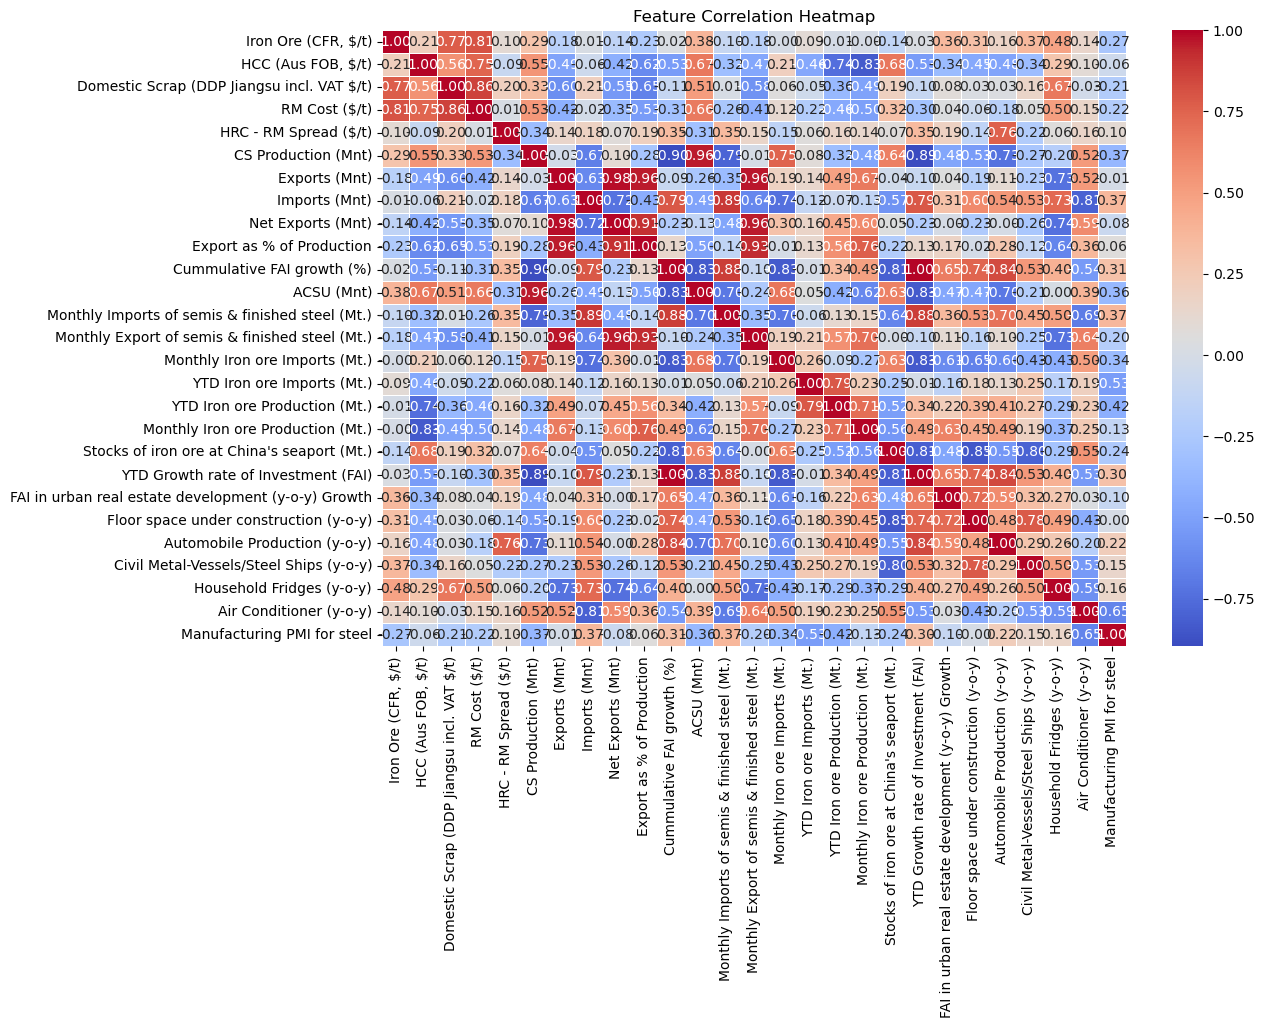

In [15]:
# Select independent variables (excluding 'HRC (FOB, $/t)' since it's the target)
X_cols = df.drop(columns=["HRC (FOB, $/t)"]).select_dtypes(include=[np.number])

# **Step 1: Compute Correlation Matrix**
corr_matrix = X_cols.corr()

# **Step 2: List Highly Correlated Features (Above ±0.7)**
threshold = 0.7
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns for col2 in corr_matrix.columns
    if col1 != col2 and abs(corr_matrix.loc[col1, col2]) >= threshold
]

# Convert to DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df = high_corr_df.drop_duplicates().sort_values(by="Correlation", ascending=False)

# Display highly correlated feature pairs
print("\n🔹 **Highly Correlated Features (|r| ≥ 0.7):**")
print(high_corr_df)

# **Step 3: Plot Correlation Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Step 3: Calculate Variance Inflation Factor (VIF)**
# **Step 4: Calculate Variance Inflation Factor (VIF)**
vif_data = pd.DataFrame()
vif_data["Feature"] = X_cols.columns
vif_data["VIF"] = [variance_inflation_factor(X_cols.values, i) for i in range(X_cols.shape[1])]

# Sort VIF values for easier interpretation
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\n🔹 **Variance Inflation Factor (VIF):**")
print(vif_data)


🔹 **Variance Inflation Factor (VIF):**
                                              Feature           VIF
10                         Cummulative FAI growth (%)  4.278672e+07
19                YTD Growth rate of Investment (FAI)  4.004964e+07
3                                       RM Cost ($/t)  6.986529e+05
1                                  HCC (Aus FOB, $/t)  1.970322e+05
7                                       Imports (Mnt)  1.858531e+05
0                                 Iron Ore (CFR, $/t)  1.509953e+05
5                                 CS Production (Mnt)  7.119238e+04
20  FAI in urban real estate development (y-o-y) G...  6.393732e+04
18        Stocks of iron ore at China's seaport (Mt.)  4.547174e+04
11                                         ACSU (Mnt)  4.145704e+04
4                               HRC - RM Spread ($/t)  7.705990e+03
2          Domestic Scrap (DDP Jiangsu incl. VAT $/t)  7.490172e+03
17                  Monthly Iron ore Production (Mt.)  7.406820e+03
15      